<a href="https://colab.research.google.com/github/SohailShaikh786/AI/blob/main/Waste_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
path = kagglehub.dataset_download('techsash/waste-classification-data')

print('Data source import complete.')
print("Path to dataset files:", path)


Using Colab cache for faster access to the 'waste-classification-data' dataset.
Data source import complete.
Path to dataset files: /kaggle/input/waste-classification-data


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob
from collections import Counter

import warnings
warnings.filterwarnings('ignore')


In [21]:
import shutil
import os
source_directory = r"/kaggle/input/waste-classification-data"
destination_directory = r"/content"
full_destination_path = os.path.join(destination_directory, "1")
try:
    shutil.copytree(source_directory, full_destination_path)
    print(f"Directory copied successfully to {full_destination_path}")
except FileExistsError:
    print(f"Directory already exists at {full_destination_path}")
except FileNotFoundError:
    print(f"Source directory not found: {source_directory}")
except Exception as e:
    print(f"An error occurred: {e}")

Directory already exists at /content/1


In [22]:
train_path = "/content/1/DATASET/TEST/"
test_path = "/content/1/DATASET/TRAIN"

In [23]:
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 1112/1112 [00:00<00:00, 2501.18it/s]


In [24]:
data.shape

(2513, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   0 non-null      float64
 1   label   0 non-null      float64
dtypes: float64(2)
memory usage: 132.0 bytes


In [7]:
Counter(y_data)

Counter()

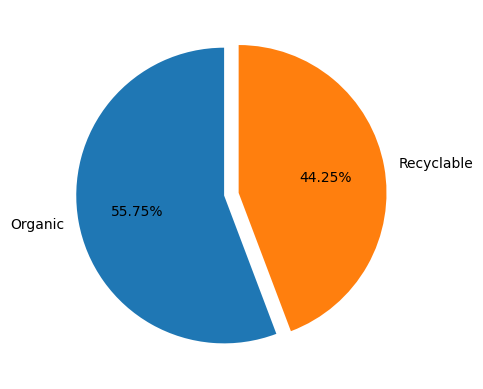

In [25]:
#plot pie chart
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'])
plt.show()



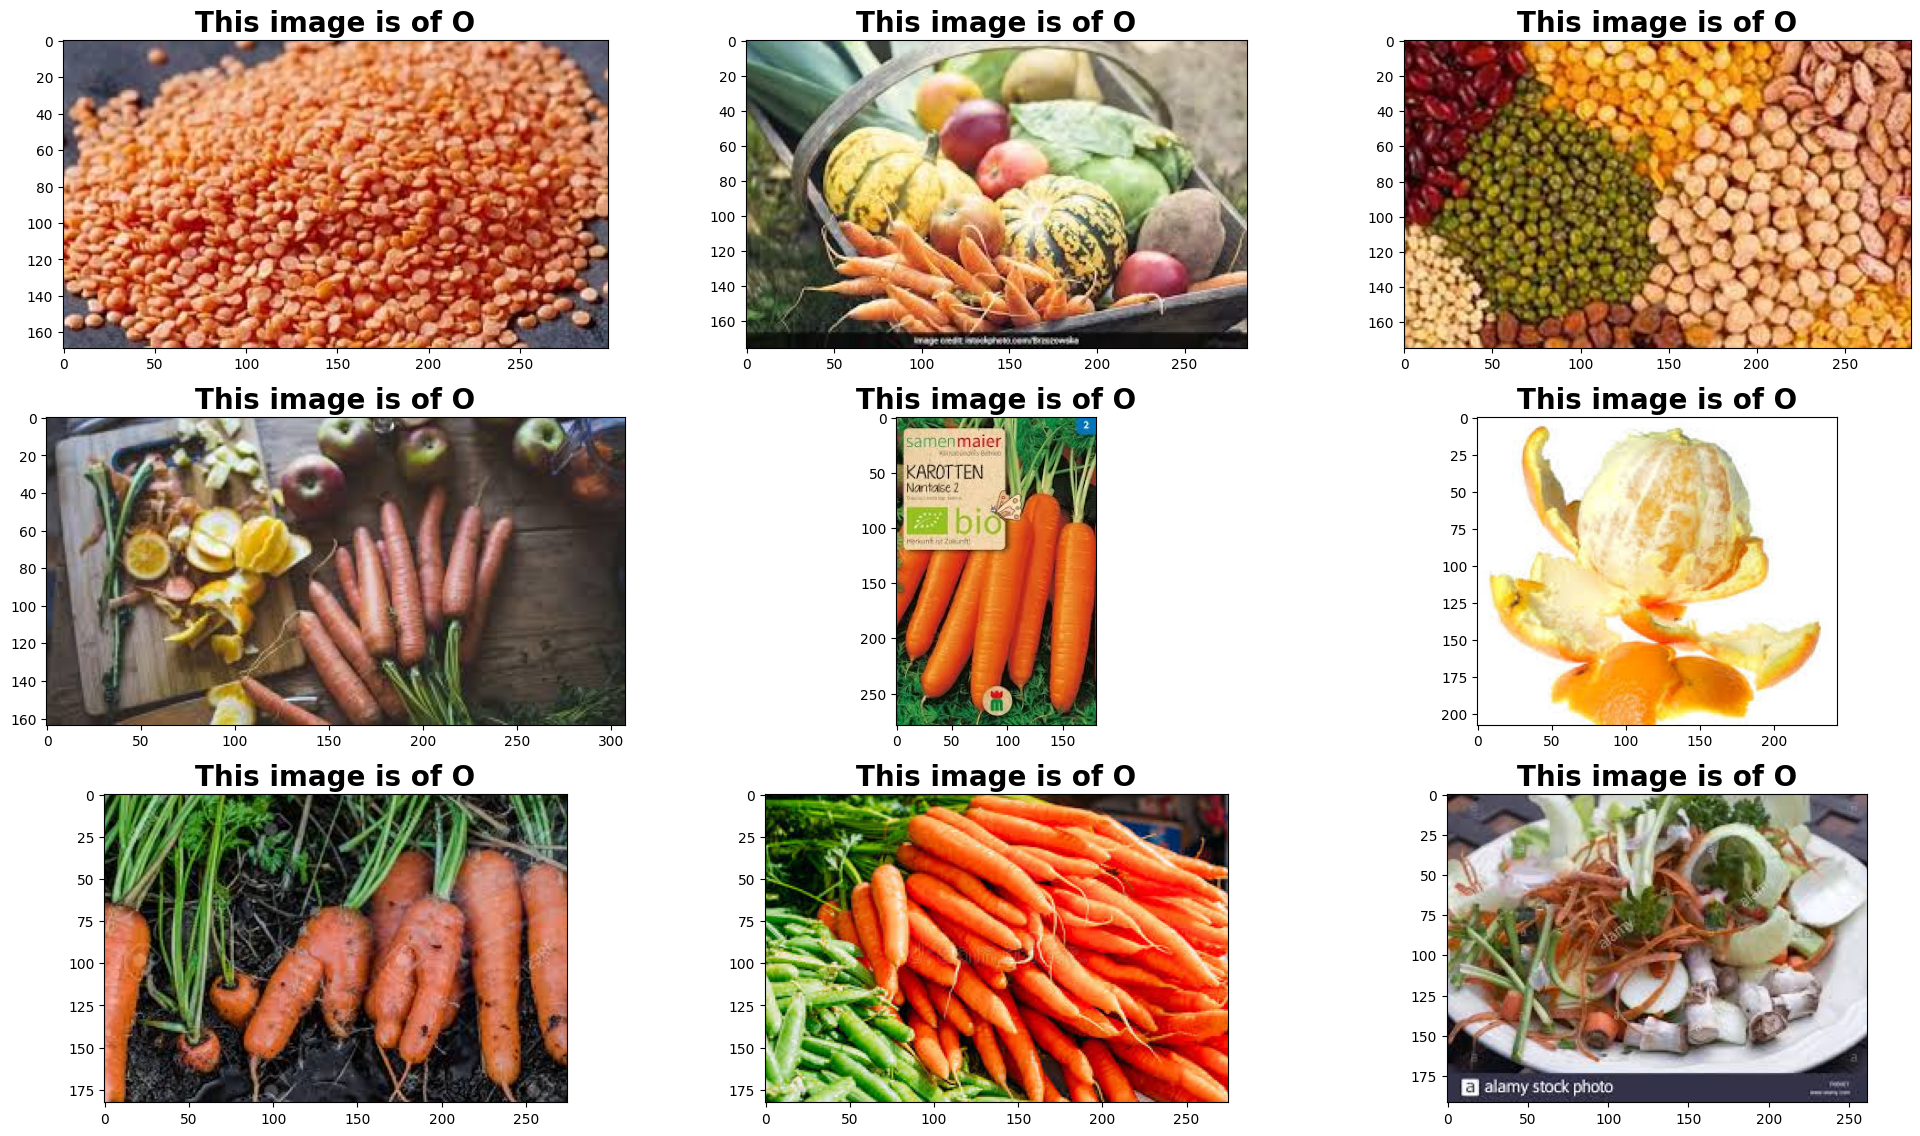

In [28]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(1500)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [30]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [31]:
model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D())

# Block 2
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D())

# Block 3
model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())

# Dense Layers
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(1))  # Binary output
model.add(Activation("sigmoid"))

# Compile
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=1e-4), metrics=["accuracy"])

batch_size = 64

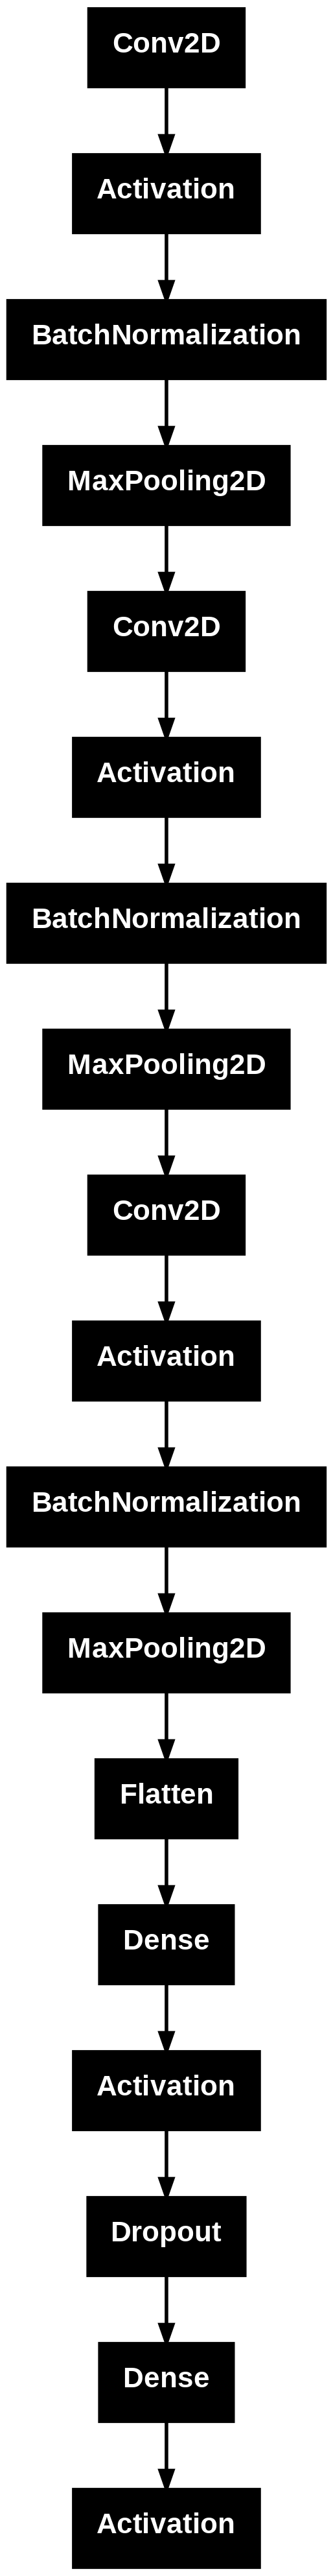

In [32]:
plot_model(model)


In [33]:
train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)


In [34]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # 👈 Important!
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # 👈 Important!
)

Found 2513 images belonging to 2 classes.
Found 7353 images belonging to 1 classes.


In [35]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 31s 279ms/step - accuracy: 0.8466 - loss: 0.7754 - val_accuracy: 0.0000e+00 - val_loss: 4.9915
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - accuracy: 0.9310 - loss: 0.2149 - val_accuracy: 1.3600e-04 - val_loss: 11.3353
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 193ms/step - accuracy: 0.9565 - loss: 0.1129 - val_accuracy: 0.0201 - val_loss: 12.4841
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - accuracy: 0.9689 - loss: 0.0810 - val_accuracy: 0.0562 - val_loss: 14.8460
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 166ms/step - accuracy: 0.9761 - loss: 0.0707 - val_accuracy: 0.1792 - val_loss: 10.1979
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 167ms/step - accuracy: 0.9764 - loss: 0.0760 - val_accuracy: 0.1371 - val_loss: 10.0287
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 172ms/step - accuracy: 0.9831 - loss: 0.0476 - val_accuracy: 0.2036 - val_loss: 12.0253
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 0.9834 - loss: 0.0

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [ ]:
def predict_func(img):
    # Show the image
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Preprocess
    img = cv2.resize(img, (224, 224))
    img = img.astype("float32") / 255.0  # Normalize if not already done
    img = np.reshape(img, (1, 224, 224, 3))

    # Predict
    pred = model.predict(img)[0][0]  # Get the single output value

    # Decision threshold
    if pred >= 0.5:
        print("\033[94mThis image -> Organic (Confidence: {:.2f})\033[0m".format(pred))
    else:
        print("\033[94mThis image -> Recyclable (Confidence: {:.2f})\033[0m".format(1 - pred))

In [ ]:
test_img = cv2.imread("/kaggle/input/waste-classification-data/DATASET/TEST/O/O_12573.jpg")
predict_func(test_img)


In [ ]:
test_img = cv2.imread("/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10753.jpg")
predict_func(test_img)